## **C23-PS251 Team (TripPal)**

1. (ML) M038DKX4056 – Muhammad Fa'iz Ismail
2. (ML) M038DSY3620 – Miftah Fahira
3. (CC) C149DSX1648 – Muhammad Faadhil Putra Wahana
4. (CC) C149DSX3413 – Nur Muhammad Alhakim
5. (MD) A150DSX2298 – Isnandar Humaedi
6. (MD) A149DSX2729 – Muhammad Lathif Habibi



**Importing Data**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#from google.colab import files
#uploades = files.upload()

In [ ]:
data = pd.read_csv('dummy.csv')
data.head()

,Nama,Email,Jenis Kelamin,Umur,Kota Domisili,Pekerjaan,No HP,Hobi,Preferensi Perjalanan,SIM
0,Nadia Sinaga,nadiasinaga@example.com,Wanita,18,Kendari,Building surveyor,878034636778,Berkebun,Wisata Alam,-
1,Ajimat Mansur,ajimatmansur@example.com,Wanita,30,Serang,Film/video editor,813884825754,Membaca,Wisata Sejarah dan Religi,SIM A dan C
2,Emong Nasyidah,emongnasyidah@example.com,Wanita,28,Pontianak,"Scientist, product/process development",896986982981,Membaca,Wisata Sejarah dan Religi,SIM A dan C
3,Jamil Suartini,jamilsuartini@example.com,Wanita,20,Malang,"Editor, magazine features",876504901522,Membaca,Wisata Kuliner,SIM A dan C
4,dr. Vinsen Winarsih,drvinsenwinarsih@example.com,Pria,23,Kota Administrasi Jakarta Timur,Newspaper journalist,822916926998,Membaca,Wisata Alam,-


**Preprocessing Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Reorder the columns to have 'Nama' as the first column
data = data[['Nama', 'Jenis Kelamin', 'Umur', 'Hobi', 'Preferensi Perjalanan']]
data.head()

,Nama,Jenis Kelamin,Umur,Hobi,Preferensi Perjalanan
0,Nadia Sinaga,Wanita,18,Berkebun,Wisata Alam
1,Ajimat Mansur,Wanita,30,Membaca,Wisata Sejarah dan Religi
2,Emong Nasyidah,Wanita,28,Membaca,Wisata Sejarah dan Religi
3,Jamil Suartini,Wanita,20,Membaca,Wisata Kuliner
4,dr. Vinsen Winarsih,Pria,23,Membaca,Wisata Alam


In [ ]:
# Preprocess the data
data['Preferensi Perjalanan'] = data['Preferensi Perjalanan'].apply(lambda x: ''.join(x.split()).lower())
data['Jenis Kelamin'] = data['Jenis Kelamin'].apply(lambda x: x.lower())
data['Hobi'] = data['Hobi'].apply(lambda x: x.lower())
data.set_index('Nama', inplace=True)
data.head()

<ipython-input-6-5a1c51e6e85a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Preferensi Perjalanan'] = data['Preferensi Perjalanan'].apply(lambda x: ''.join(x.split()).lower())
<ipython-input-6-5a1c51e6e85a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Jenis Kelamin'] = data['Jenis Kelamin'].apply(lambda x: x.lower())
<ipython-input-6-5a1c51e6e85a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Jenis Kelamin,Umur,Hobi,Preferensi Perjalanan
Nama,,,,
Nadia Sinaga,wanita,18,berkebun,wisataalam
Ajimat Mansur,wanita,30,membaca,wisatasejarahdanreligi
Emong Nasyidah,wanita,28,membaca,wisatasejarahdanreligi
Jamil Suartini,wanita,20,membaca,wisatakuliner
dr. Vinsen Winarsih,pria,23,membaca,wisataalam


In [ ]:
# Create bag of words for data
data['bag_of_words'] = data['Jenis Kelamin'].astype(str) + ' ' + data['Umur'].astype(str) + ' ' + ' ' + data['Hobi'].astype(str) + ' ' + data['Preferensi Perjalanan'].astype(str)
data.drop(columns=['Jenis Kelamin', 'Umur', 'Hobi', 'Preferensi Perjalanan'], inplace=True)
data.head()

,bag_of_words
Nama,
Nadia Sinaga,wanita 18 berkebun wisataalam
Ajimat Mansur,wanita 30 membaca wisatasejarahdanreligi
Emong Nasyidah,wanita 28 membaca wisatasejarahdanreligi
Jamil Suartini,wanita 20 membaca wisatakuliner
dr. Vinsen Winarsih,pria 23 membaca wisataalam


**Feature Extraction**


*   Processing using a content-based recommendation approach
*   Creating recommendations using the cosine similarity method based on the similarity between available data







In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Create count matrix for data
count = CountVectorizer()
count_matrix = count.fit_transform(data['bag_of_words'])

indices = pd.Series(data.index)
cosine_sim = cosine_similarity(count_matrix, count_matrix)

def recommendations(nama, cosine_sim=cosine_sim):
  recommended_people = []
  idx = indices[indices == nama].index[0]
  score_series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
  top_10_indexes = list(score_series.iloc[1:11].index)
  for i in top_10_indexes:
    recommended_people.append(list(data.index)[i])
  return recommended_people

In [ ]:
count_matrix.shape

(20000, 48)

In [ ]:
recommendations('Nadia Sinaga')

['Wahyu Sihombing',
 'Latif Mansur',
 'Ir. Jelita Waskita',
 'Bakianto Uwais',
 'Adikara Prasasta, S.IP',
 'Calista Haryanto',
 'Irfan Gunarto',
 'Marwata Wulandari, S.IP',
 'Kamila Habibi, S.E.',
 'Diah Melani']

**Splitting Data**


*   Splitting features (X) and labels (y)
*   Splitting data into training and testing sets



In [ ]:
data['Recommendations'] = data.index.map(recommendations)
data['CorrectRecommendation'] = data.apply(lambda x: x.name in x['Recommendations'], axis=1)

# Split the test data into features (X) and labels (y)
data.reset_index(drop=True, inplace=True)
indices = data.index.to_numpy()
X = count_matrix[indices]
y = data['CorrectRecommendation'].astype(int)

In [ ]:
X.toarray().shape

(20000, 48)

In [ ]:
print(X)

  (0, 1)	1
  (0, 34)	1
  (0, 43)	1
  (0, 44)	1
  (1, 13)	1
  (1, 38)	1
  (1, 43)	1
  (1, 46)	1
  (2, 11)	1
  (2, 38)	1
  (2, 43)	1
  (2, 46)	1
  (3, 3)	1
  (3, 38)	1
  (3, 43)	1
  (3, 45)	1
  (4, 6)	1
  (4, 38)	1
  (4, 42)	1
  (4, 44)	1
  (5, 2)	1
  (5, 41)	1
  (5, 43)	1
  (5, 45)	1
  (6, 19)	1
  :	:
  (19993, 45)	1
  (19994, 4)	1
  (19994, 36)	1
  (19994, 43)	1
  (19994, 46)	1
  (19995, 13)	1
  (19995, 36)	1
  (19995, 43)	1
  (19995, 45)	1
  (19996, 15)	1
  (19996, 36)	1
  (19996, 43)	1
  (19996, 44)	1
  (19997, 24)	1
  (19997, 41)	1
  (19997, 42)	1
  (19997, 44)	1
  (19998, 22)	1
  (19998, 40)	1
  (19998, 42)	1
  (19998, 47)	1
  (19999, 30)	1
  (19999, 37)	1
  (19999, 43)	1
  (19999, 47)	1


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 48)
(4000, 48)
(16000,)
(4000,)


**Testing and Evaluating the test results**

In [ ]:
accuracy = y_test.mean()
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert the ground truth labels to the appropriate data type, if needed
y_true = y_test.astype(int)

# Convert the predicted labels to the appropriate data type, if needed
y_pred = y_test.astype(int)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.83575
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Check if the model is overfitting
if conf_matrix[0, 0] == y_true.sum() and conf_matrix[1, 1] == y_true.sum():
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Confusion Matrix:
[[ 657    0]
 [   0 3343]]
Model is not overfitting


**Preparing for the model and training**

In [ ]:
# Convert bag of words to a numeric representation
count_matrix = count_matrix.toarray()

# Define the input shape based on the count matrix shape
input_shape = count_matrix.shape[1]

# Define the number of output classes (binary classification)
num_classes = 2

**Model**


> The model utilizes a Neural Network (NN) architecture called Dense



In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.utils import to_categorical

# Convert y
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
print(X_train)

  (0, 9)	1
  (0, 38)	1
  (0, 43)	1
  (0, 45)	1
  (1, 30)	1
  (1, 36)	1
  (1, 43)	1
  (1, 45)	1
  (2, 22)	1
  (2, 41)	1
  (2, 42)	1
  (2, 47)	1
  (3, 3)	1
  (3, 40)	1
  (3, 42)	1
  (3, 47)	1
  (4, 29)	1
  (4, 36)	1
  (4, 43)	1
  (4, 45)	1
  (5, 32)	1
  (5, 34)	1
  (5, 43)	1
  (5, 45)	1
  (6, 4)	1
  :	:
  (15993, 47)	1
  (15994, 12)	1
  (15994, 40)	1
  (15994, 43)	1
  (15994, 46)	1
  (15995, 28)	1
  (15995, 36)	1
  (15995, 42)	1
  (15995, 44)	1
  (15996, 17)	1
  (15996, 37)	1
  (15996, 43)	1
  (15996, 45)	1
  (15997, 30)	1
  (15997, 40)	1
  (15997, 42)	1
  (15997, 45)	1
  (15998, 30)	1
  (15998, 35)	1
  (15998, 42)	1
  (15998, 47)	1
  (15999, 10)	1
  (15999, 38)	1
  (15999, 42)	1
  (15999, 45)	1


**Training the Model**

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 3s 3ms/step - loss: 0.4687 - accuracy: 0.8263 - val_loss: 0.4474 - val_accuracy: 0.8357
Epoch 2/10
500/500 [==============================] - 1s 3ms/step - loss: 0.4517 - accuracy: 0.8329 - val_loss: 0.4495 - val_accuracy: 0.8357
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.4510 - accuracy: 0.8329 - val_loss: 0.4487 - val_accuracy: 0.8357
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.4507 - accuracy: 0.8329 - val_loss: 0.4495 - val_accuracy: 0.8357
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.4502 - accuracy: 0.8329 - val_loss: 0.4502 - val_accuracy: 0.8357
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.4499 - accuracy: 0.8329 - val_loss: 0.4505 - val_accuracy: 0.8357
Epoch 7/10
500/500 [==============================] - 1s 3ms/step - loss: 0.4490 - accuracy: 0.8329 - val_loss: 0.4513 - val_accuracy: 0.8357
Epoch 

**Plotting Loss and Accuracy**

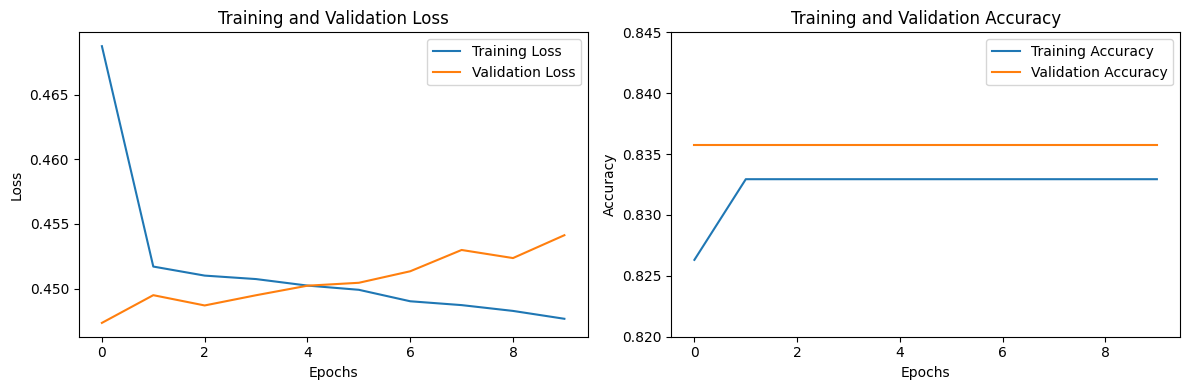

In [ ]:
import matplotlib.pyplot as plt

# Get the training loss and accuracy history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Get the validation loss and accuracy history
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the training loss and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Set the y-axis range for accuracy
plt.ylim([0.820, 0.845])

plt.legend()
plt.tight_layout()
plt.show()

**Saving Model**

In [ ]:
# Save model
model.save("TripPal.h5")

In [ ]:
#Save model CountVectorizer
from joblib import dump, load
dump(count, 'Model CV.joblib')

['Model CV.joblib']

**Loading Model and Making Matching Function**

In [ ]:
#clf = load('Model CV.joblib')

In [ ]:
def matching(text):
  tf_model = tf.keras.models.load_model('TripPal.h5')
  clf = load('Model CV.joblib')
  count_matrix = clf.transform([text])
  print(count_matrix)
  save = model.predict(count_matrix)
  return save.tolist()

In [ ]:
count_matrix

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
# Trying to input text to the function
t = 'wanita 19 memasak wisataalam'
matching(t)

  (0, 2)	1
  (0, 37)	1
  (0, 43)	1
  (0, 44)	1
1/1 [==============================] - 0s 115ms/step


[[0.01697356253862381, 0.9830264449119568]]